## Analisis de datos


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


##### No se encontraron datos perdidos y los tipos de datos son correctos para su análisis

##### Para continuar con el análisis de las correlaciones, dascarto la columna Product_id, el cual no influye en la variable precio que se quiere estimar

In [4]:
data.drop('Product_id',axis=1, inplace=True)
data.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


<AxesSubplot: >

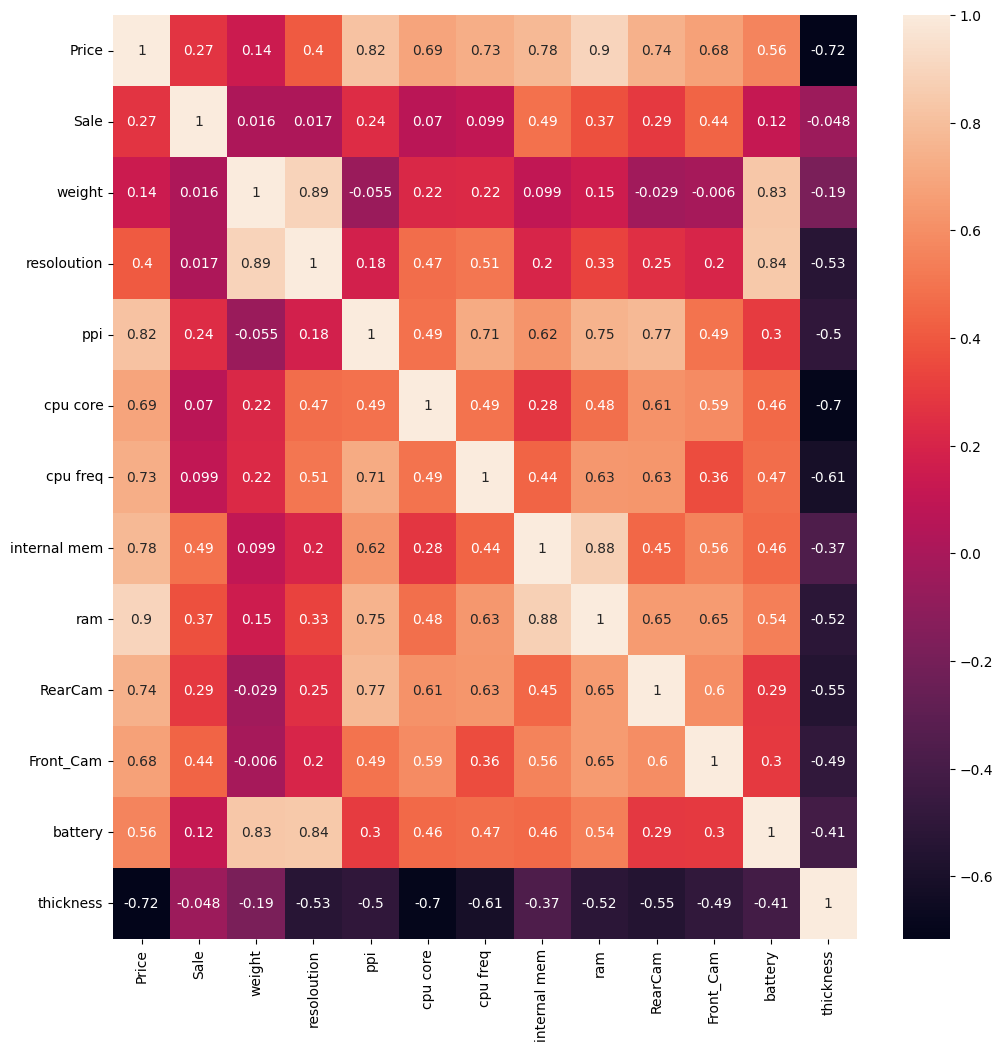

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

##### De la tabla se observa la fuerte correlación positiva entre la variable precio y ppi(píxels per inh o píxeles por pulgada), veremos este resultado en un gráfico de dispersión


<AxesSubplot: xlabel='ppi', ylabel='Price'>

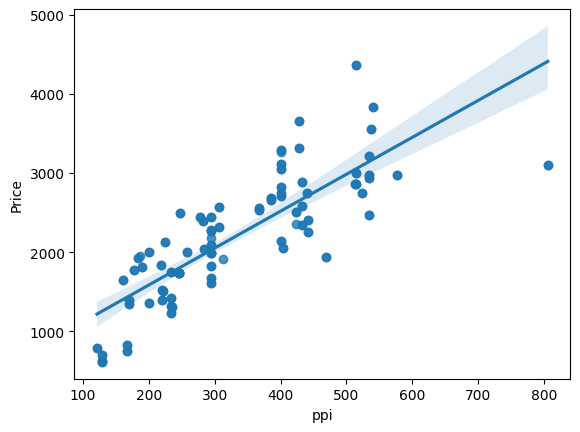

In [6]:
sns.regplot(x="ppi",y="Price",data=data)


##### Del gráfico anterior se muestra que mientras aumenta los ppi el precio del celular aumenta, correlación positiva. Por lo tanto, la variable ppi, ayudaría bastante en el modelo.



##### Ahora analizaré la variable weight y determinaremos de manera gráfica si seria útil en el modelo.

<AxesSubplot: xlabel='weight', ylabel='Price'>

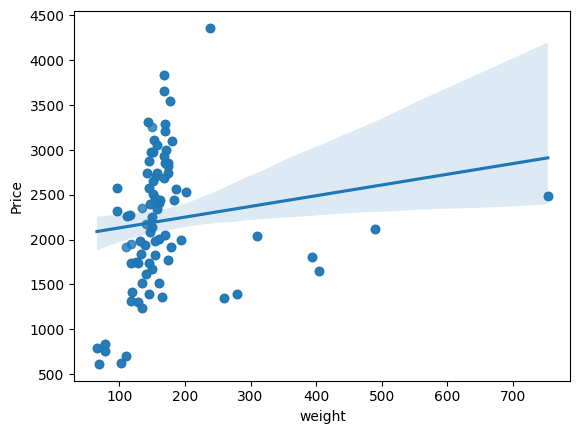

In [7]:
sns.regplot(x='weight',y='Price',data=data)

##### Del gráfico anterior los datos presentan mucha dispersión, se encuentran alejados de la línea de regresión. Por lo tanto, no seria útil en el modelo.

##### Según la correlación identificada, se va considerar en el modelo las siguientes variables :
<lo>
 <li>ppi</li>
<li>cpu core</li>
<li>cpu freq</li>
<li>internal mem</li>
<li>ram</li>
<li>RearCam</li>
<li>Front_Cam</li>
<li>baterry</li>
<li>thickness</li>
</lo>

## Desarrollo de modelo

In [8]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [61]:
def graficaFunciones(freal,fprueba,rojo,azul,titulo):
    width=15
    height=13
    plt.figure(figsize=(width,height))
    f1=sns.distplot(freal,hist=False,color='r',label=rojo)
    f1=sns.distplot(fprueba,hist=False,color='b',label=azul,ax=f1)

    plt.title(titulo)
    plt.xlabel('Precio celular')
    plt.ylabel('Proporcion')
    plt.legend()
    plt.show()
    plt.close()

##### Para el desarrollo de modelo comenzaré definiendo la variable independiente x, y la dependiente, y.

In [10]:
lm=LinearRegression()
x_datos=data[["ppi","cpu core","cpu freq","internal mem","ram","RearCam","Front_Cam","battery","thickness"]]
y_datos=data["Price"]


##### Dividimos los datos en entrenamiento y prueba para el modelo.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_datos,y_datos,test_size=0.4,random_state=1)

##### Para el desarrollo del modelo usaremos dos tipos de algoritmos de machine learning: Regresión múltiple lineal (MLR) y regresión polinomial (PR). Primero entrenamos el modelo de regresión Múltiple y luego probamos su funcionamiento.

In [67]:
lm.fit(x_train,y_train)
pred=lm.predict(x_test)

##### Ahora se puede evaluar que tan bien puede predecir el modelo con el coeficiente de determinación (R^2) y error medio cuadrado (MSE).

In [73]:
r2mlr=lm.score(x_test,y_test)
msemlr=mean_squared_error(pred,y_test)
print("R^2: ",r2mlr)
print('MSE: ',msemlr)

R^2:  0.9282198539154756
MSE:  37514.43763272474


C:\Users\Aldo\AppData\Local\Temp\ipykernel_13272\2175983.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f1=sns.distplot(freal,hist=False,color='r',label=rojo)
C:\Users\Aldo\AppData\Local\Temp\ipykernel_13272\2175983.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f1=sns.distplot(fprueba,hist=Fa

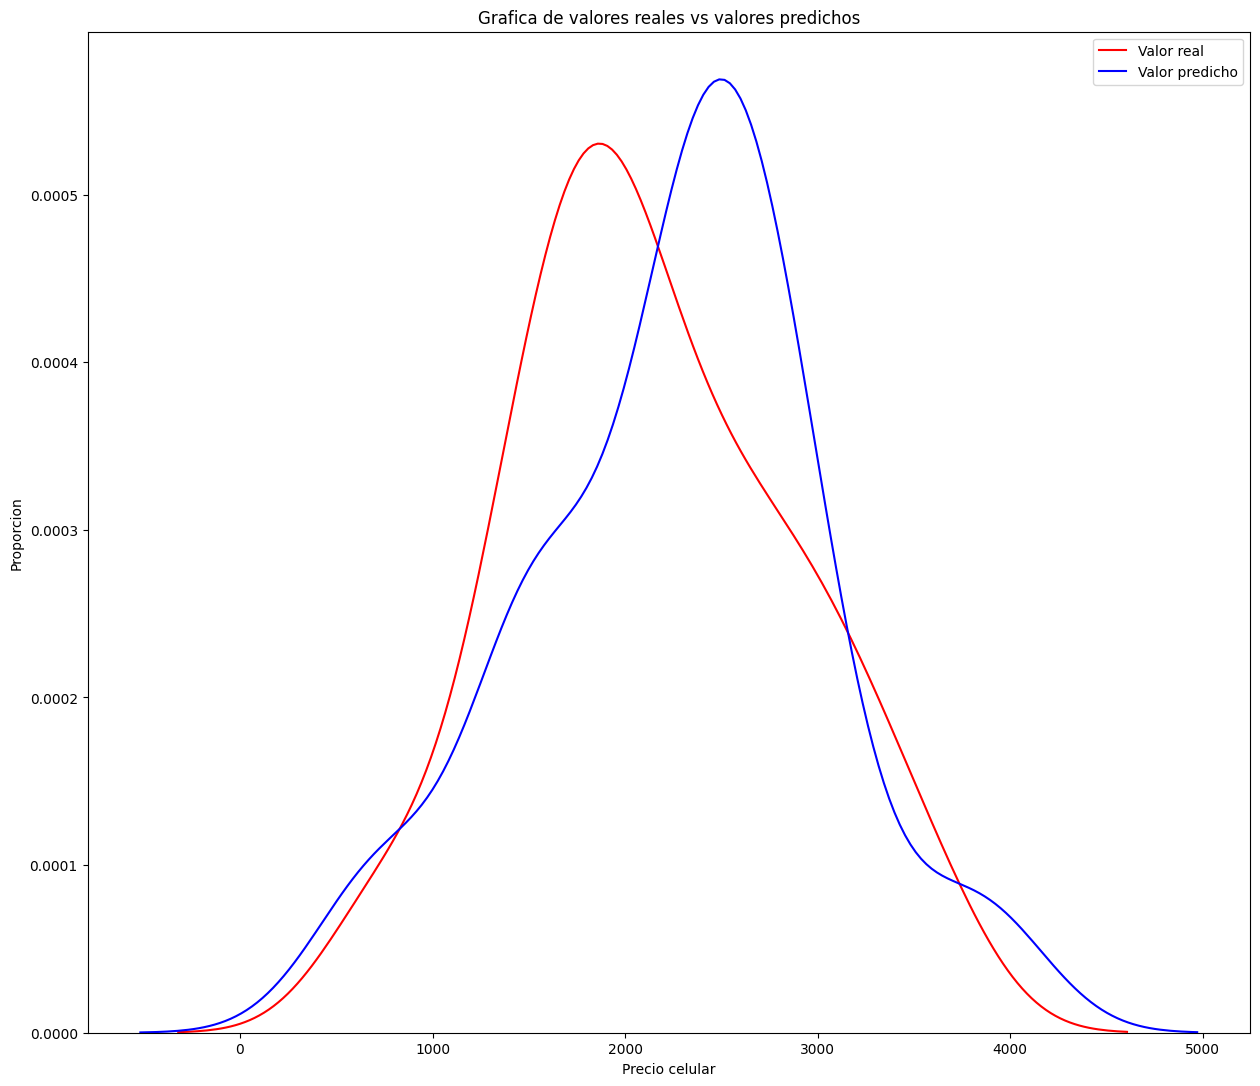

In [62]:
title="Grafica de valores reales vs valores predichos"
graficaFunciones(y_test,pred,'Valor real','Valor predicho',title)

##### Del gráfico anterior se pueden observar rangos en las cuales el modelo no estima adecuadamente el precio.

##### Ahora evaluaremos con el algoritmo de regresión polinomial


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

##### Evaluaremos de manera grafica el mejor grado que debería tener el polinomio para garantizar el mayor coeficiente de determinación (R^2) posible. 

Text(0, 0.5, 'Coeficiente de determinación R^2')

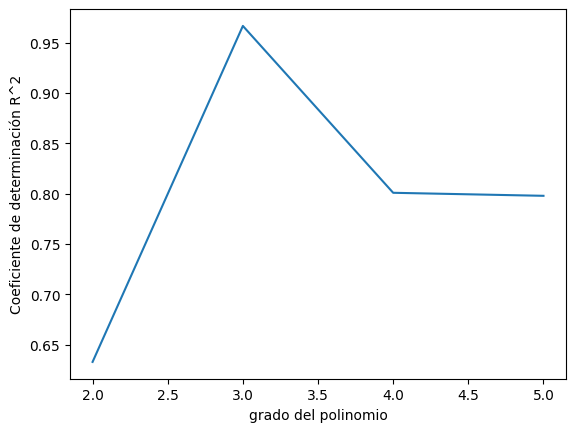

In [16]:
puntajeR2=[]
grados=[2,3,4,5]
for n in grados:
    entrada=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=n,include_bias=False)),('model',LinearRegression())]
    pipeline=Pipeline(entrada)
    pipeline.fit(x_train,y_train)
    puntajeR2.append(pipeline.score(x_test,y_test))

plt.plot(grados,puntajeR2)
plt.xlabel("grado del polinomio")
plt.ylabel("Coeficiente de determinación R^2")


##### Del gráfico se pude observar que  el mejor grado del polinomio sería de 3.

In [74]:
entrada=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=3,include_bias=False)),('model',LinearRegression())]
pipeline=Pipeline(entrada)
pipeline.fit(x_train,y_train)
predpoli=pipeline.predict(x_test)
r2pr=pipeline.score(x_test,y_test)
msepr=mean_squared_error(predpoli,y_test)
print('R^2: ',r2pr)
print('MSE: ',msepr)

R^2:  0.9667007200622695
MSE:  17403.193342176215


C:\Users\Aldo\AppData\Local\Temp\ipykernel_13272\2175983.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f1=sns.distplot(freal,hist=False,color='r',label=rojo)
C:\Users\Aldo\AppData\Local\Temp\ipykernel_13272\2175983.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f1=sns.distplot(fprueba,hist=Fa

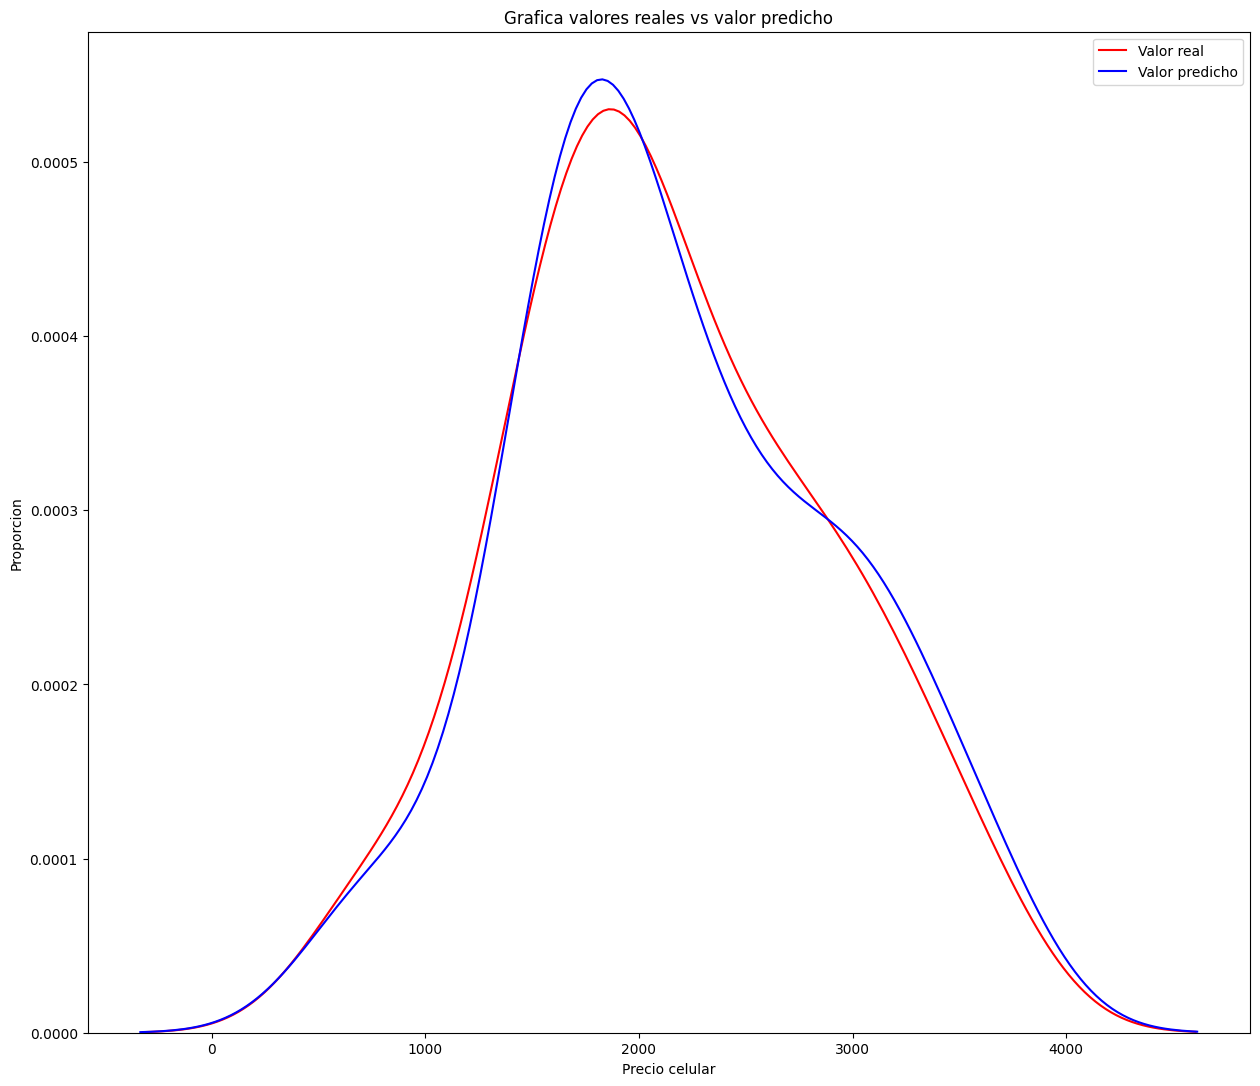

In [63]:
title='Grafica valores reales vs valor predicho'
graficaFunciones(y_test,predpoli,'Valor real','Valor predicho',title)

In [78]:
al=['MLR','PR']
puntR2=[r2mlr,r2pr]
puntmse=[msemlr,msepr]

##### Del gráfico anterior y con el mayor puntaje de R2, se concluye que algoritmo de regresión polinomial es mejor modelo para el presente caso.

In [89]:
df=pd.DataFrame()
df['Algoritmo']=al
df['R^2']=puntR2
df['MSE']=puntmse
df.set_index('Algoritmo',inplace=True)
df

,R^2,MSE
Algoritmo,,
MLR,0.928220,37514.437633
PR,0.966701,17403.193342
